In [4]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# GP-Value Shaping Illustration

This notebook demonstrates the bare-bones GP-Value Shaping model on correlated Landscapes.

In [5]:
import mesa
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from abm.model import SocialGPModel
from abm.rewards import make_parent_and_children_gabor, make_parent_and_children_mexican_hat, check_correlations

sns.set_theme(style="whitegrid")

## 1. Correlated Reward Landscapes

We generate correlated reward landscapes where a 'parent' map defines the general structure, and 'children' maps are correlated with it.

### 1.a Gabor

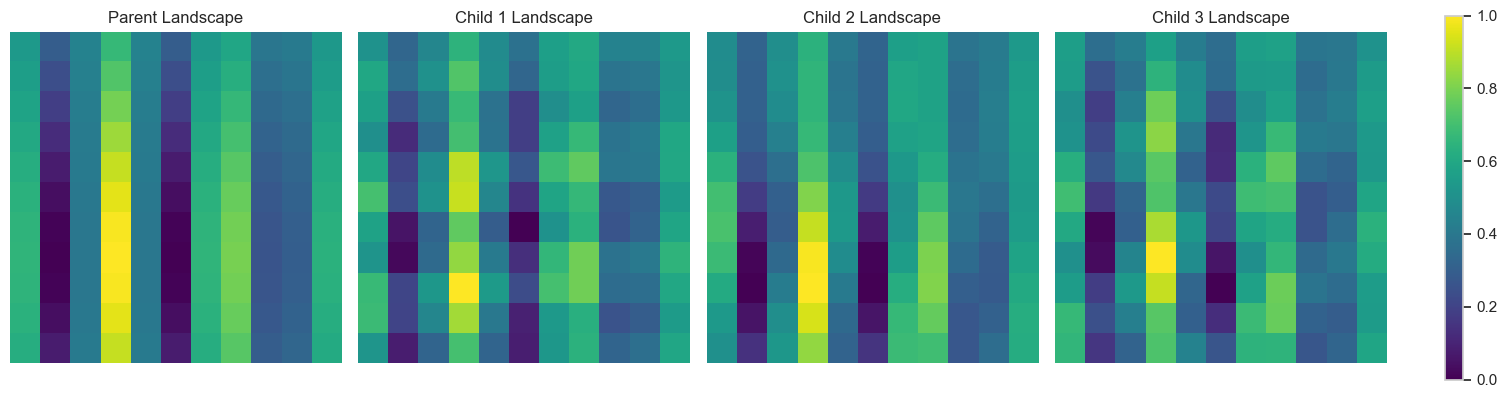

[np.float64(0.9499790754586327),
 np.float64(0.9552422314811077),
 np.float64(0.9495972194988955)]

In [ ]:
rng = np.random.default_rng(42)
n_children = 3
grid_size = 11

parent, children = make_parent_and_children_gabor(
    rng=rng,
    grid_size=grid_size,
    n_children=n_children,
    frequency=3,
    sigma=5,
    theta_parent=0,
    phase_parent=0,
    correlation=0.95,
    center=(3.0, 3.0)
)

fig, axes = plt.subplots(1, n_children + 1, figsize=(15, 4))
im = axes[0].imshow(parent, cmap='viridis', origin='lower')
axes[0].set_title("Parent Landscape")

for i, child in enumerate(children):
    axes[i+1].imshow(child, cmap='viridis', origin='lower')
    axes[i+1].set_title(f"Child {i+1} Landscape")

for ax in axes:
    ax.axis('off')

plt.tight_layout()
fig.colorbar(im, ax=axes, orientation='vertical', fraction=0.02, pad=0.04)
plt.show()

check_correlations(parent, children, target_correlation=0.95, tol=0.1)[1]

### 1.b Difference of Gaussians

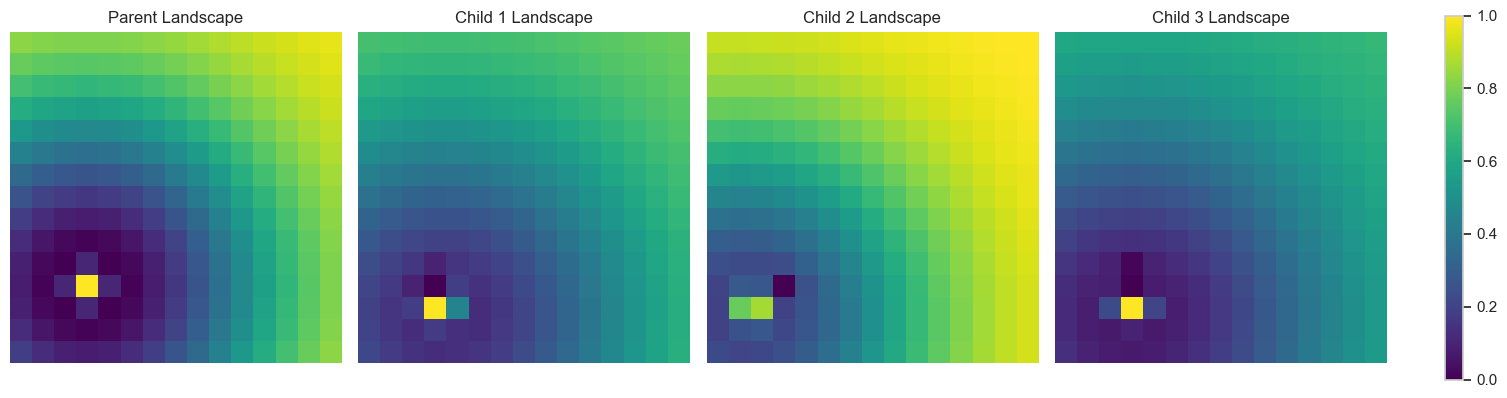

(np.True_,
 [np.float64(0.9000000000000002),
  np.float64(0.9000000000000004),
  np.float64(0.8999999999999997)])

In [28]:
rng = np.random.default_rng(42)
n_children = 3
grid_size = 15

parent, children = make_parent_and_children_mexican_hat(
    rng=rng,
    grid_size=grid_size,
    n_children=n_children,
    sigma_inner=0.5,
    sigma_outer=6,
    correlation=0.9,
    center=(3, 3)
)

fig, axes = plt.subplots(1, n_children + 1, figsize=(15, 4))
im = axes[0].imshow(parent, cmap='viridis', origin='lower')
axes[0].set_title("Parent Landscape")

for i, child in enumerate(children):
    axes[i+1].imshow(child, cmap='viridis', origin='lower')
    axes[i+1].set_title(f"Child {i+1} Landscape")

for ax in axes:
    ax.axis('off')

plt.tight_layout()
fig.colorbar(im, ax=axes, orientation='vertical', fraction=0.02, pad=0.04)
plt.show()

check_correlations(parent, children, target_correlation=0.9, tol=0.1)

## 2. Running the Model

We run a simulation with 1 agent

### 2.1 Individual agents ($\alpha = 0$)

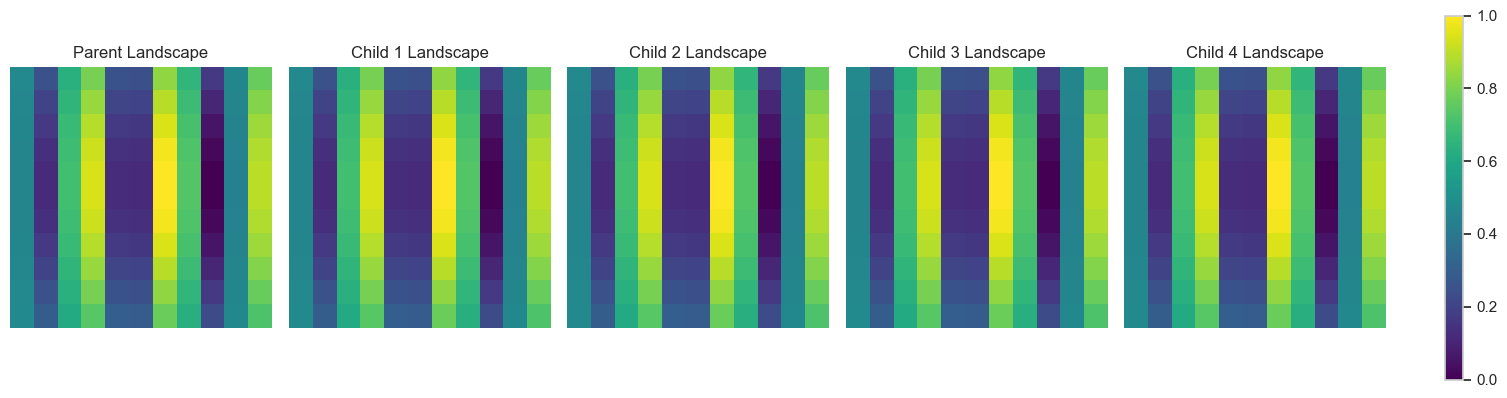

[np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0)]

In [73]:
n_children = 4
grid_size = 11
rng = np.random.default_rng(42)
reward_params = {
    'frequency': 3,
    'sigma': 5,
    'correlation': 1
}

parent, children = make_parent_and_children_gabor(
    rng=rng,
    grid_size=grid_size,
    n_children=n_children,
    **reward_params
)

fig, axes = plt.subplots(1, n_children + 1, figsize=(15, 4))
im = axes[0].imshow(parent, cmap='viridis', origin='lower')
axes[0].set_title("Parent Landscape")

for i, child in enumerate(children):
    axes[i+1].imshow(child, cmap='viridis', origin='lower')
    axes[i+1].set_title(f"Child {i+1} Landscape")

for ax in axes:
    ax.axis('off')

plt.tight_layout()
fig.colorbar(im, ax=axes, orientation='vertical', fraction=0.02, pad=0.04)
plt.show()

check_correlations(parent, children, target_correlation=reward_params['correlation'], tol=0.1)[1]

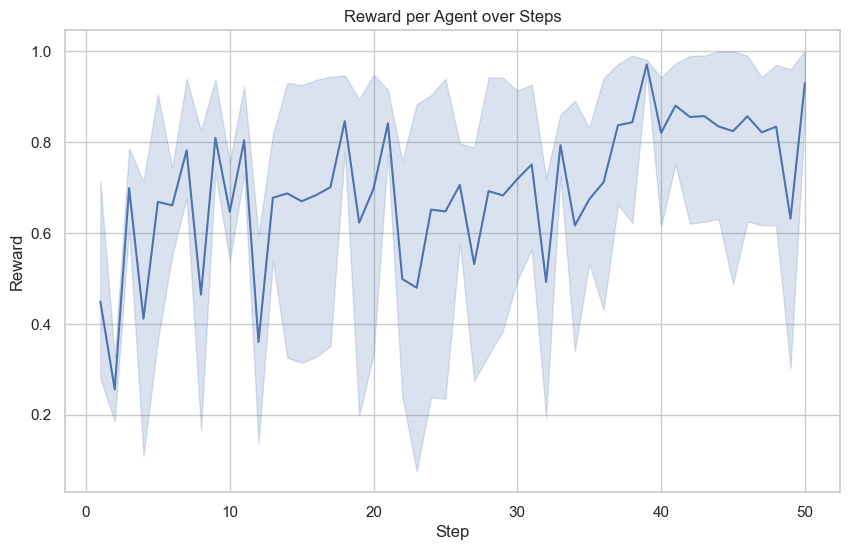

In [80]:
rng = np.random.default_rng(42)
lamda = grid_size / (2*np.pi * reward_params['frequency'])
model = SocialGPModel(n=4, 
                      grid_size=grid_size,  
                      rng=rng, 
                      alpha=0,
                      beta=0.33, 
                      length_scale=lamda,
                      reward_env_type='gabor', 
                      reward_env_params=reward_params
)
for _ in range(50):
    model.step()

agent_results = model.datacollector.get_agent_vars_dataframe()

plt.figure(figsize=(10, 6))
sns.lineplot(data=agent_results.reset_index(), x="Step", y="reward")
plt.title("Reward per Agent over Steps")
plt.xlabel("Step")
plt.ylabel("Reward")
plt.show()

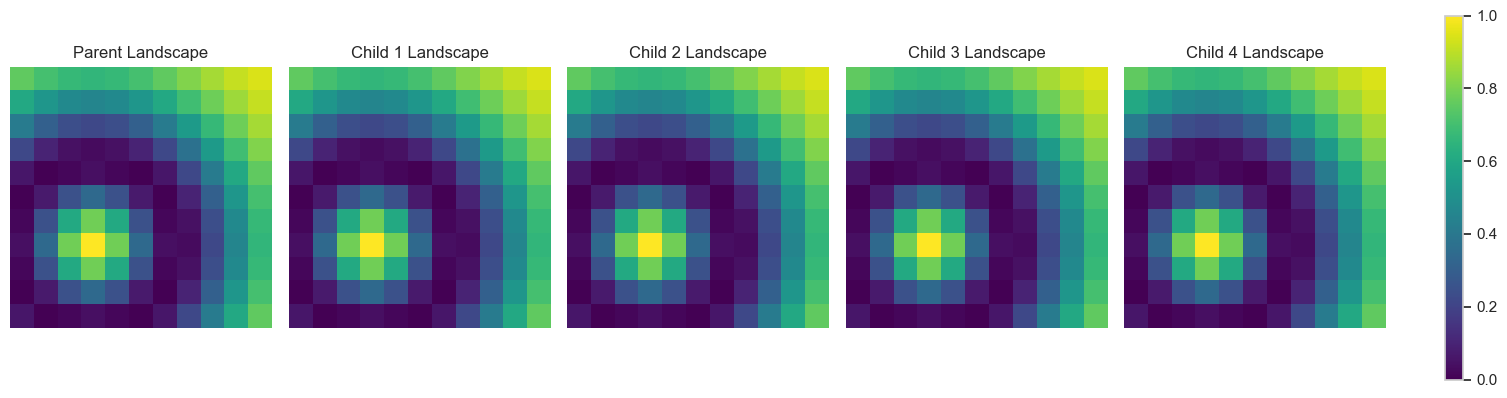

[np.float64(0.9999999999999998),
 np.float64(0.9999999999999998),
 np.float64(0.9999999999999998),
 np.float64(0.9999999999999998)]

In [ ]:
n_children = 4
grid_size = 11
rng = np.random.default_rng(42)
reward_params = {
    'frequency': 1.5,
    'correlation': 1,
    'center': (3, 3)
}

parent, children = make_parent_and_children_mexican_hat(
    rng=rng,
    grid_size=grid_size,
    n_children=n_children,
    **reward_params
)

fig, axes = plt.subplots(1, n_children + 1, figsize=(15, 4))
im = axes[0].imshow(parent, cmap='viridis', origin='lower')
axes[0].set_title("Parent Landscape")

for i, child in enumerate(children):
    axes[i+1].imshow(child, cmap='viridis', origin='lower')
    axes[i+1].set_title(f"Child {i+1} Landscape")

for ax in axes:
    ax.axis('off')

plt.tight_layout()
fig.colorbar(im, ax=axes, orientation='vertical', fraction=0.02, pad=0.04)
plt.show()

check_correlations(parent, children, target_correlation=reward_params['correlation'], tol=0.1)[1]

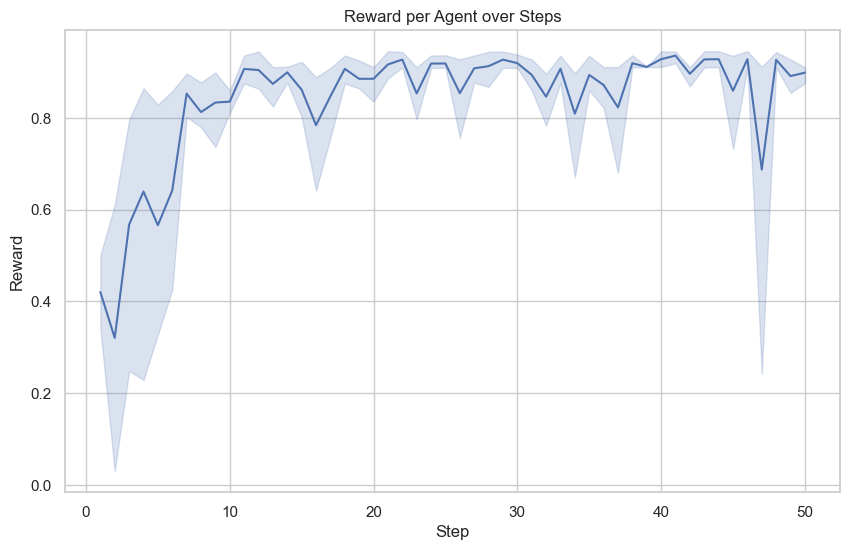

In [92]:
rng = np.random.default_rng(42)
lamda = grid_size / (2*np.pi * reward_params['frequency'])
model = SocialGPModel(n=4, 
                      grid_size=grid_size,  
                      rng=rng, 
                      alpha=0,
                      beta=0.33, 
                      length_scale=lamda,
                      reward_env_type='dog', 
                      reward_env_params=reward_params
)
for _ in range(50):
    model.step()

agent_results = model.datacollector.get_agent_vars_dataframe()

plt.figure(figsize=(10, 6))
sns.lineplot(data=agent_results.reset_index(), x="Step", y="reward")
plt.title("Reward per Agent over Steps")
plt.xlabel("Step")
plt.ylabel("Reward")
plt.show()

## 3. Comparing Social Influence ($\alpha$)

The parameter $\alpha$ controls the weight of social information relative to private information.

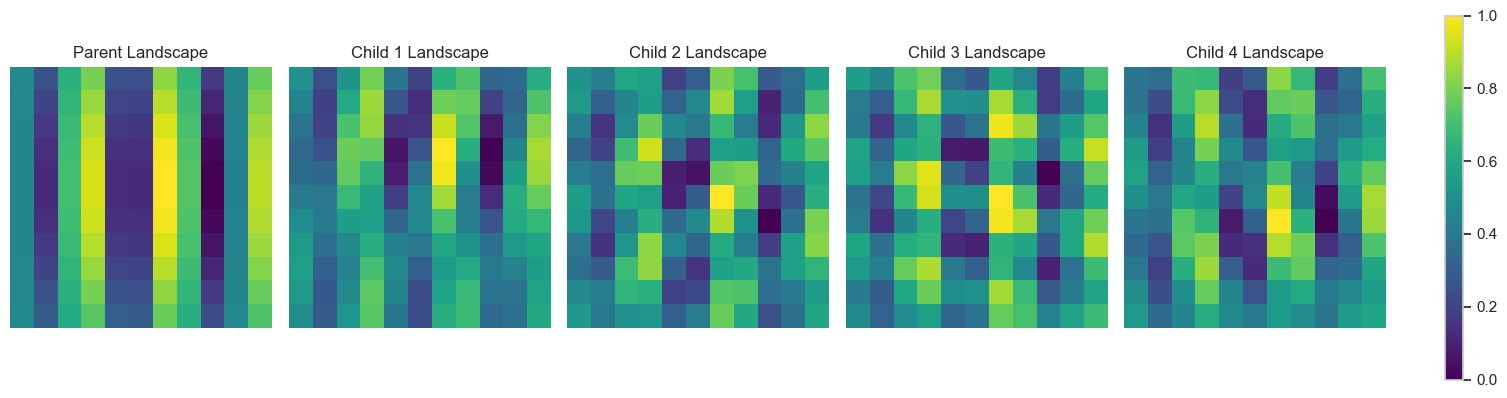

[np.float64(0.8519408673244915),
 np.float64(0.8505379696719257),
 np.float64(0.850019634668762),
 np.float64(0.8516877103426532)]

In [113]:
grid_size = 11
rng = np.random.default_rng(42)
reward_params = {
    'frequency': 3,
    'sigma': 5,
    'correlation': 0.85
}
params = {
    "n": [5],
    "grid_size": grid_size,
    "rng": rng,
    "beta": 0.3,
    "length_scale": grid_size / (2*np.pi * reward_params['frequency']),
    "tau": 0.01,
    "alpha": [0.0, 0.5, 1.0],
    "reward_env_type": 'gabor',
    "reward_env_params": [reward_params]
}


parent, children = make_parent_and_children_gabor(
    rng=rng,
    grid_size=grid_size,
    n_children=n_children,
    **reward_params
)
fig, axes = plt.subplots(1, n_children + 1, figsize=(15, 4))
im = axes[0].imshow(parent, cmap='viridis', origin='lower')
axes[0].set_title("Parent Landscape")
for i, child in enumerate(children):
    axes[i+1].imshow(child, cmap='viridis', origin='lower')
    axes[i+1].set_title(f"Child {i+1} Landscape")
for ax in axes:
    ax.axis('off')
plt.tight_layout()
fig.colorbar(im, ax=axes, orientation='vertical', fraction=0.02, pad=0.04)
plt.show()
check_correlations(parent, children, target_correlation=reward_params['correlation'], tol=0.1)[1]

In [114]:
batch_results = mesa.batch_run(
    SocialGPModel,
    parameters=params,
    max_steps=25,
    display_progress=True,
    data_collection_period=1,
    number_processes=None,
)

  0%|          | 0/3 [00:00<?, ?it/s]

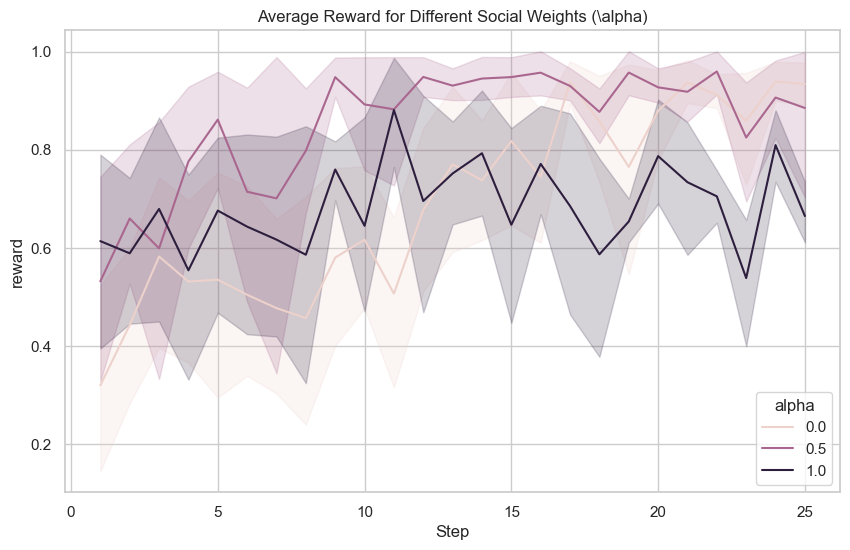

In [115]:
df_batch = pd.DataFrame(batch_results)
df_batch = df_batch[df_batch.AgentID.notna()]

plt.figure(figsize=(10, 6))
sns.lineplot(data=df_batch, x="Step", y="reward", hue="alpha")
plt.title("Average Reward for Different Social Weights (\\alpha)")
plt.show()

In [116]:
df_batch

,RunId,iteration,Step,n,grid_size,rng,beta,length_scale,tau,alpha,reward_env_type,reward_env_params,avg_cumulative_reward,avg_reward,AgentID,choice,reward,cumulative_reward
0,0,0,1.0,5,11,None,0.3,0.583568,0.01,0.0,gabor,"{'frequency': 3, 'sigma': 5, 'correlation': 0.85}",0.319612,0.319612,1,"(7, 5)",-0.000256,-0.000256
1,0,0,1.0,5,11,None,0.3,0.583568,0.01,0.0,gabor,"{'frequency': 3, 'sigma': 5, 'correlation': 0.85}",0.319612,0.319612,2,"(2, 3)",0.700849,0.700849
2,0,0,1.0,5,11,None,0.3,0.583568,0.01,0.0,gabor,"{'frequency': 3, 'sigma': 5, 'correlation': 0.85}",0.319612,0.319612,3,"(1, 2)",0.381706,0.381706
3,0,0,1.0,5,11,None,0.3,0.583568,0.01,0.0,gabor,"{'frequency': 3, 'sigma': 5, 'correlation': 0.85}",0.319612,0.319612,4,"(2, 2)",0.342990,0.342990
4,0,0,1.0,5,11,None,0.3,0.583568,0.01,0.0,gabor,"{'frequency': 3, 'sigma': 5, 'correlation': 0.85}",0.319612,0.319612,5,"(0, 9)",0.172772,0.172772
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
370,2,0,25.0,5,11,None,0.3,0.583568,0.01,1.0,gabor,"{'frequency': 3, 'sigma': 5, 'correlation': 0.85}",17.062593,0.682504,1,"(6, 7)",0.577407,18.913780
371,2,0,25.0,5,11,None,0.3,0.583568,0.01,1.0,gabor,"{'frequency': 3, 'sigma': 5, 'correlation': 0.85}",17.062593,0.682504,2,"(5, 8)",0.675613,15.703693
372,2,0,25.0,5,11,None,0.3,0.583568,0.01,1.0,gabor,"{'frequency': 3, 'sigma': 5, 'correlation': 0.85}",17.062593,0.682504,3,"(6, 8)",0.792119,14.153874
373,2,0,25.0,5,11,None,0.3,0.583568,0.01,1.0,gabor,"{'frequency': 3, 'sigma': 5, 'correlation': 0.85}",17.062593,0.682504,4,"(7, 8)",0.621107,18.033613


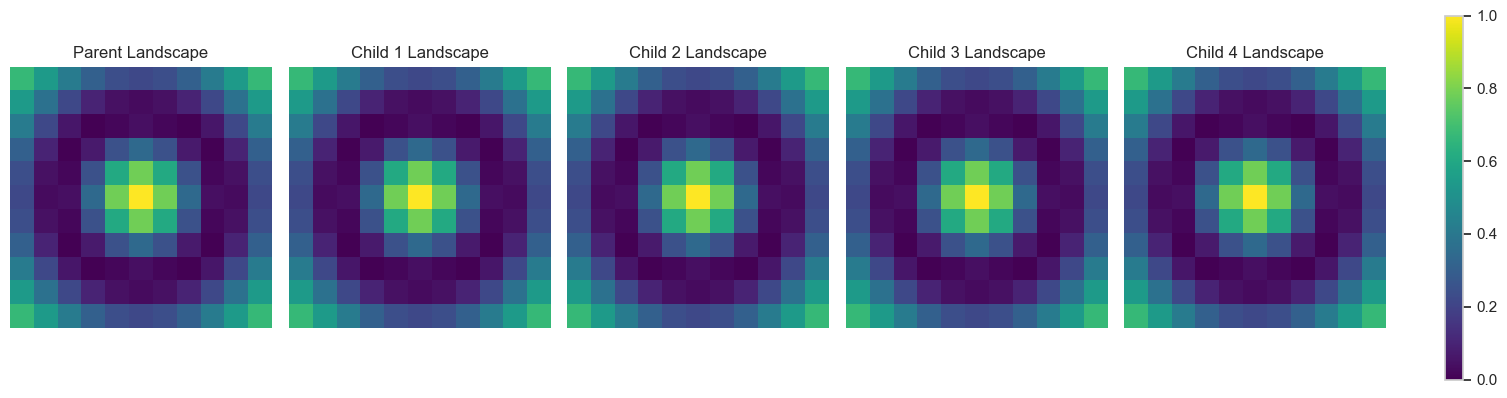

[np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0)]

In [117]:
grid_size = 11
rng = np.random.default_rng(42)
reward_params = {
    'frequency': 1.5,
    'correlation': 1
}
params = {
    "n": [5],
    "grid_size": grid_size,
    "rng": rng,
    "beta": 0.3,
    "length_scale": grid_size / (2*np.pi * reward_params['frequency']),
    "tau": 0.01,
    "alpha": [0.0, 0.5, 1.0],
    "reward_env_type": 'mexican_hat',
    "reward_env_params": [reward_params]
}


parent, children = make_parent_and_children_mexican_hat(
    rng=rng,
    grid_size=grid_size,
    n_children=n_children,
    **reward_params
)
fig, axes = plt.subplots(1, n_children + 1, figsize=(15, 4))
im = axes[0].imshow(parent, cmap='viridis', origin='lower')
axes[0].set_title("Parent Landscape")
for i, child in enumerate(children):
    axes[i+1].imshow(child, cmap='viridis', origin='lower')
    axes[i+1].set_title(f"Child {i+1} Landscape")
for ax in axes:
    ax.axis('off')
plt.tight_layout()
fig.colorbar(im, ax=axes, orientation='vertical', fraction=0.02, pad=0.04)
plt.show()
check_correlations(parent, children, target_correlation=reward_params['correlation'], tol=0.1)[1]

In [118]:
batch_results = mesa.batch_run(
    SocialGPModel,
    parameters=params,
    max_steps=25,
    display_progress=True,
    data_collection_period=1,
    number_processes=None,
)

  0%|          | 0/3 [00:00<?, ?it/s]

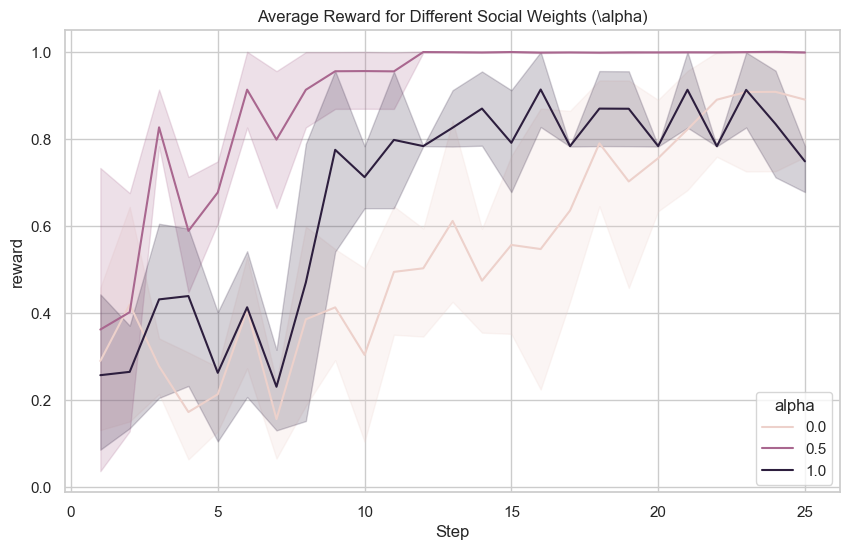

In [119]:
df_batch = pd.DataFrame(batch_results)
df_batch = df_batch[df_batch.AgentID.notna()]

plt.figure(figsize=(10, 6))
sns.lineplot(data=df_batch, x="Step", y="reward", hue="alpha")
plt.title("Average Reward for Different Social Weights (\\alpha)")
plt.show()